In [3]:
from skmob.measures.individual import real_entropy, uncorrelated_entropy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import skmob
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

formatter = ticker.FormatStrFormatter("%.1f")

In [233]:
data = pd.read_csv("mandagsmagi.csv", index_col=0)

In [179]:
data = data[data["ad_creation_time"] >= "2018-01-01"]
data["ad_creation_time"] = pd.to_datetime(data["ad_creation_time"])
data["year"] = data["ad_creation_time"].dt.year
data["month"] = data["ad_creation_time"].dt.month

In [180]:
data = data.drop([
        "ad_creative_body",
        "spend",
        "impressions",
        "delivery_by_region",
        "demographic_distribution",
        "bylines",
        "spend_lo",
        "spend_hi",
        "impressions_lo",
        "impressions_hi",
    ],
    axis=1,
)

In [182]:
entropy_results = []

# group together: user, year, and month to calculate entropy on
for (politician, year, month), group_data in data.groupby(["page_id", "year", "month"]):

    # extra nice info to have together with the basics from TrajDataframe
    party = group_data["party"].iloc[0]
    ad_creation_time = group_data["ad_creation_time"].iloc[0]
    name = group_data["page_name"].iloc[0]

    # scikit mobility code
    group_data["top_label_int"] = (
        pd.factorize(group_data["top_label"], sort=True)[0] + 1
    )
    group_data["lat"] = 0.0 #placeholder

    tdf = skmob.TrajDataFrame(
        group_data,
        latitude="lat",
        longitude="top_label_int",
        datetime="ad_creation_time",
        user_id="page_id",
    )

    tdf = tdf.sort_values(by=["uid", "datetime"])
    
    # calc entropy -> monthly data
    ue_df = uncorrelated_entropy(tdf, normalize=False)
    # re_df = real_entropy(tdf)

    # Append the result with user, year, month, and calculated entropy
    entropy_results.append(
        {
            "user_id": politician,
            "name": name,
            "party": party,
            "ad_creation_time": ad_creation_time,
            "year": year,
            "month": month,
            "entropy": ue_df["uncorrelated_entropy"].iloc[
                0
            ],  
    
        }
    )
entropy_ue = pd.DataFramei(entropy_results)
# entropy_re = pd.DataFrame(entropy_results) # second run for real entropy

# entropy_ue.to_csv("monthly_uncor.csv")
# entropy_re.to_csv("monthly_real.csv")

100%|██████████| 1/1 [00:00<00:00, 75.57it/s]


In [4]:
monthly_uncor = pd.read_csv(
    "/Users/sofiepalmuskronborg/Desktop/monthly_uncor.csv",
)

monthly_uncor = monthly_uncor[monthly_uncor["year"] >= 2018]

monthly_real = pd.read_csv(
    "/Users/sofiepalmuskronborg/Desktop/monthly_real.csv",
)

monthly_real = monthly_real[monthly_real["year"] >= 2018]

In [5]:
monthly_uncor["date"] = pd.to_datetime(monthly_uncor[["year", "month"]].assign(day=1))
monthly_real["date"] = pd.to_datetime(monthly_real[["year", "month"]].assign(day=1))

In [6]:
uncor_d = monthly_uncor[monthly_uncor["party"] == "Democrat"]
uncor_r = monthly_uncor[monthly_uncor["party"] == "Republican"]
real_d = monthly_real[monthly_real["party"] == "Democrat"]
real_r = monthly_real[monthly_real["party"] == "Republican"]

## to-do make nicer plot for a single politician for report

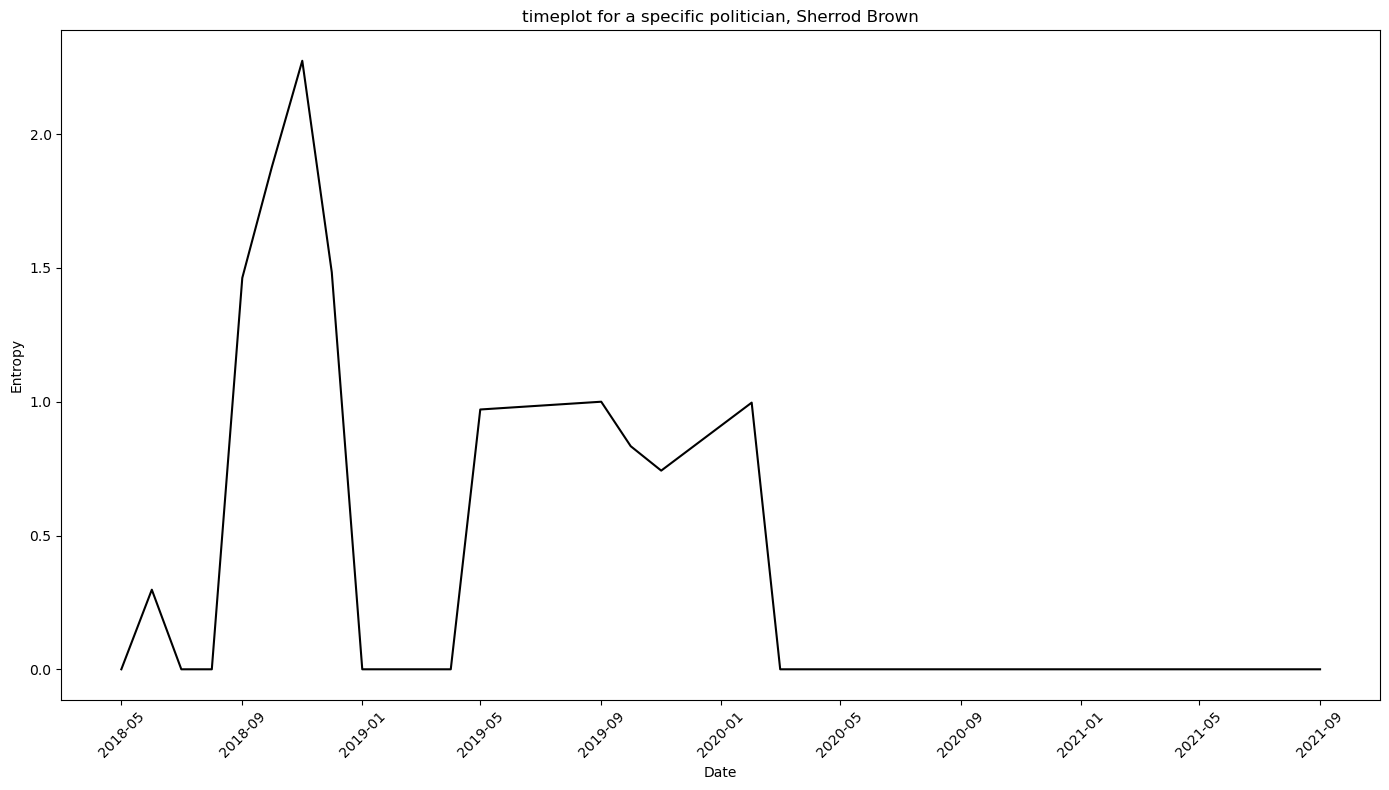

In [7]:
# filtered_df = uncor[(uncor["date"].dt.year == 2020) & (uncor["date"].dt.month == 2)]
filtered_df = uncor_d[uncor_d["user_id"] == 6266829799]

plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_df, x="date", y="entropy", color="black")

plt.title("timeplot for a specific politician, Sherrod Brown")
plt.xlabel("Date")
plt.ylabel("Entropy")
#plt.legend(
#    title="politician id", bbox_to_anchor=(1.05, 1), loc="upper left"
#)  # Puts legend outside the plot
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

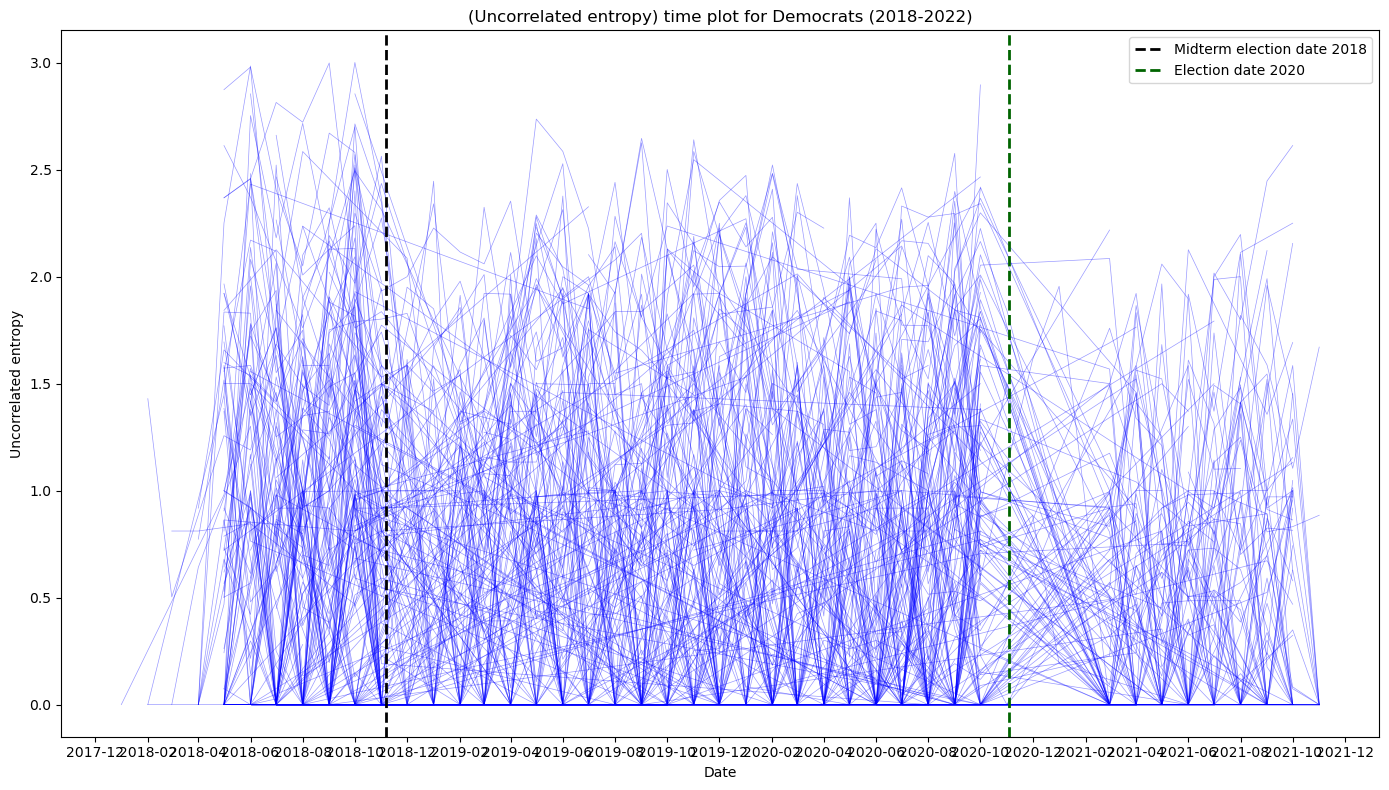

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# don't want 2016+2017, filter away 2018 to 2022
filtered_df = uncor_d[(uncor_d["year"] >= 2018) & (uncor_d["year"] <= 2022)]

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=filtered_df,
    x="date",
    y="entropy",
    units="user_id",
    estimator=None,
    color="blue",
    linewidth=0.5,
    alpha=0.4,
)

plt.title("(Uncorrelated entropy) time plot for Democrats (2018-2022)")
plt.xlabel("Date")
plt.ylabel("Uncorrelated entropy")

# show all months on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.axvline(
    pd.Timestamp("2018-11-06"),
    color="black",
    linestyle="--",
    linewidth=2,
    label="Midterm election date 2018",
)
plt.axvline(
    pd.Timestamp("2020-11-03"),
    color="darkgreen",
    linestyle="--",
    linewidth=2,
    label="Election date 2020",
)

plt.xlim(pd.Timestamp("2018-01-01T00:00"), pd.Timestamp("2021-12-31T23:59"))
ticks = pd.date_range("2018-01-01", "2021-12-01", freq="3M")
plt.xticks(ticks, rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

/var/folders/cr/2b4bjd0d6cscnr8h_66vmrqm0000gn/T/ipykernel_39256/2802682269.py:42: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ticks = pd.date_range("2018-01-01", "2021-12-01", freq="3M")


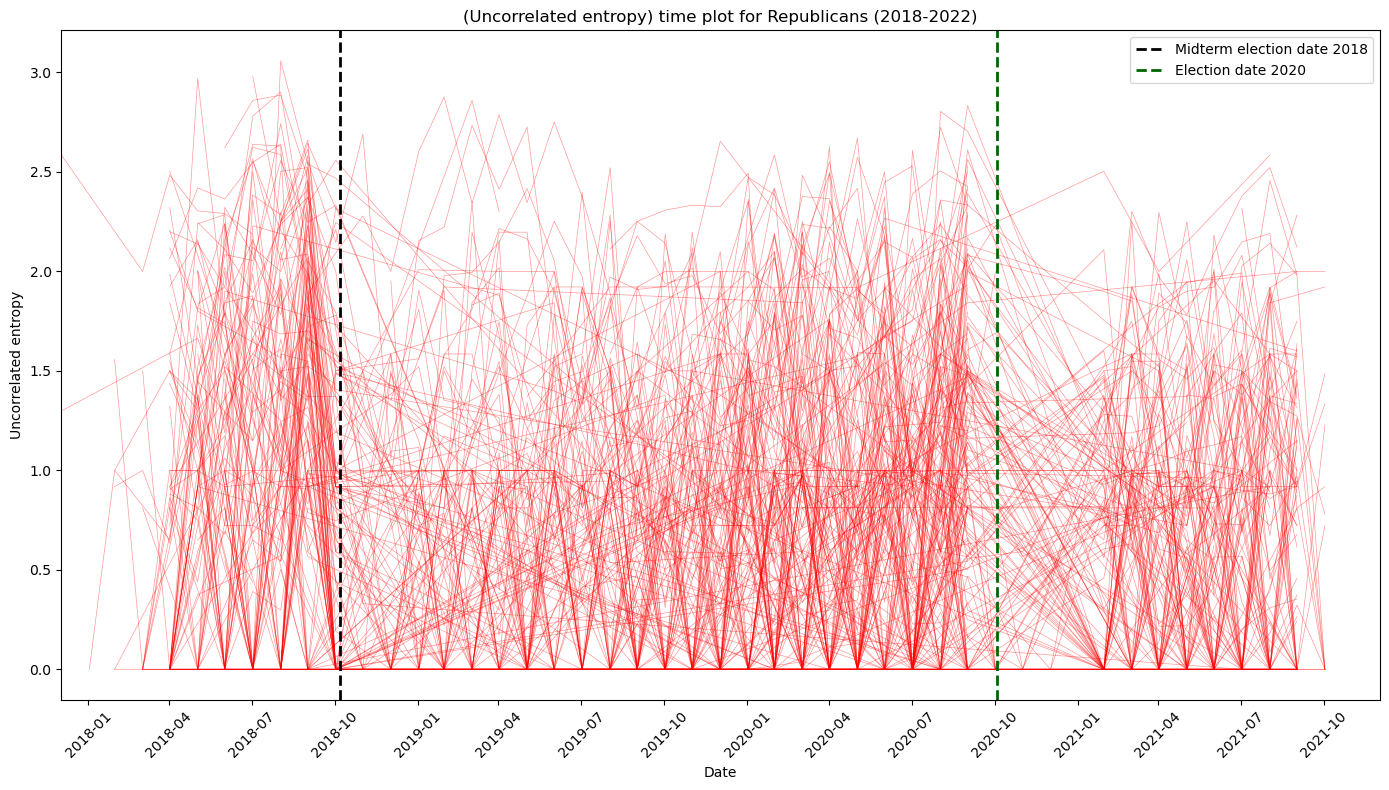

In [273]:
# don't want 2016+2017, filter away 2018 to 2022
filtered_r = uncor_r[(uncor_r["year"] >= 2018) & (uncor_r["year"] <= 2022)]

plt.figure(figsize=(14, 8))

sns.lineplot(
    data=filtered_r,
    x="date",
    y="entropy",
    units="user_id",
    estimator=None,
    color="red",
    linewidth=0.5,
    alpha=0.4,
)

plt.title("(Uncorrelated entropy) time plot for Republicans (2018-2022)")
plt.xlabel("Date")
plt.ylabel("Uncorrelated entropy")

# show all months on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.xticks(rotation=45)

plt.axvline(
    pd.Timestamp("2018-11-06"),
    color="black",
    linestyle="--",
    linewidth=2,
    label="Midterm election date 2018",
)
plt.axvline(
    pd.Timestamp("2020-11-03"),
    color="darkgreen",
    linestyle="--",
    linewidth=2,
    label="Election date 2020",
)
plt.xlim(pd.Timestamp("2018-01-01T00:00"), pd.Timestamp("2021-12-31T23:59"))
ticks = pd.date_range("2018-01-01", "2021-12-01", freq="3M")
plt.xticks(ticks, rotation=45)

plt.legend()
plt.tight_layout()

plt.show()

/var/folders/cr/2b4bjd0d6cscnr8h_66vmrqm0000gn/T/ipykernel_39256/1221960043.py:42: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ticks = pd.date_range("2018-01-01", "2021-12-01", freq="3M")


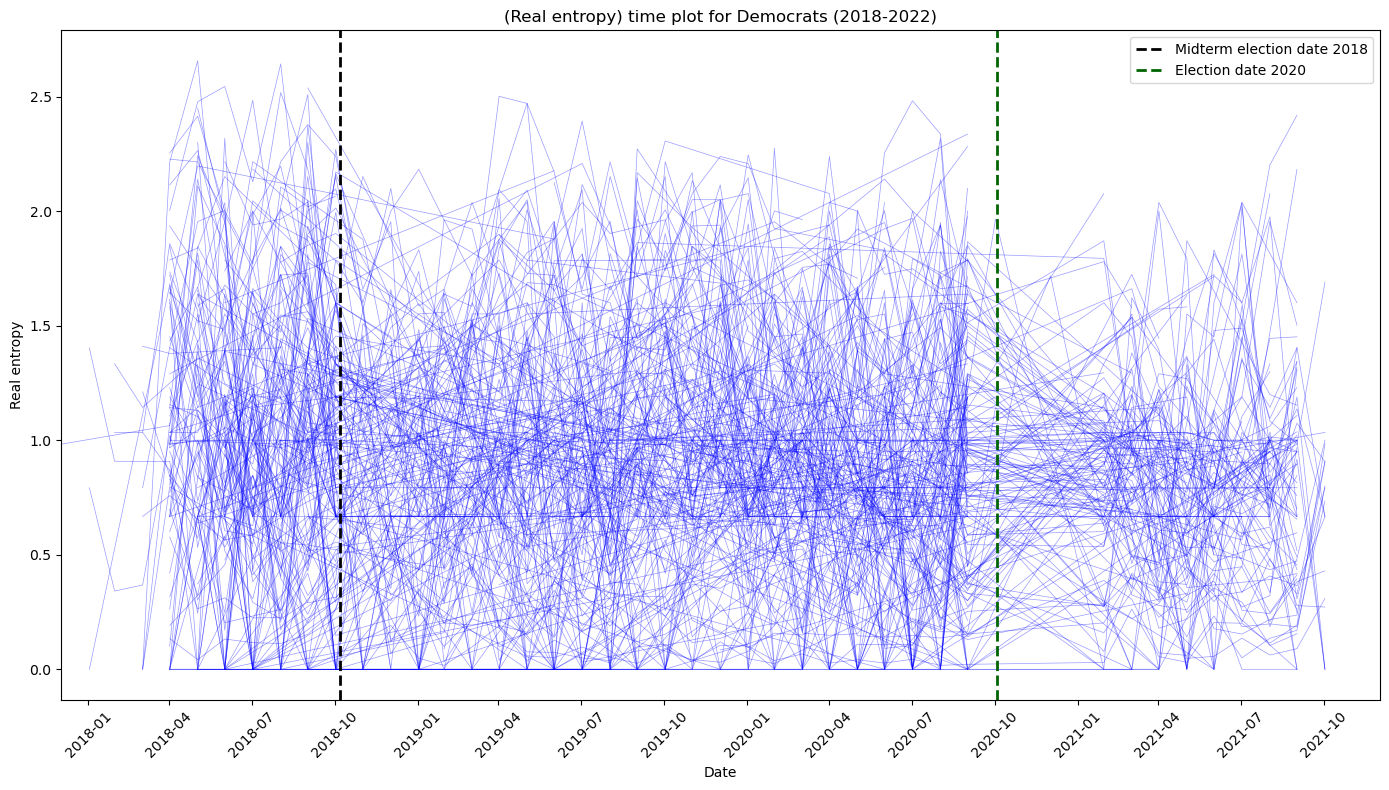

In [248]:
# don't want 2016+2017, filter away 2018 to 2022
filtered_df = real_d[(real_d["year"] >= 2018) & (real_d["year"] <= 2022)]

plt.figure(figsize=(14, 8))

sns.lineplot(
    data=filtered_df,
    x="date",
    y="entropy",
    units="user_id",
    estimator=None,
    color="blue",
    linewidth=0.5,
    alpha=0.4,
)

plt.title("(Real entropy) time plot for Democrats (2018-2022)")
plt.xlabel("Date")
plt.ylabel("Real entropy")

# show all months on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.xticks(rotation=45)

plt.axvline(
    pd.Timestamp("2018-11-06"),
    color="black",
    linestyle="--",
    linewidth=2,
    label="Midterm election date 2018",
)
plt.axvline(
    pd.Timestamp("2020-11-03"),
    color="darkgreen",
    linestyle="--",
    linewidth=2,
    label="Election date 2020",
)
plt.xlim(pd.Timestamp("2018-01-01T00:00"), pd.Timestamp("2021-12-31T23:59"))
ticks = pd.date_range("2018-01-01", "2021-12-01", freq="3M")
plt.xticks(ticks, rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

/var/folders/cr/2b4bjd0d6cscnr8h_66vmrqm0000gn/T/ipykernel_39256/2369119883.py:42: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ticks = pd.date_range("2018-01-01", "2021-12-01", freq="3M")


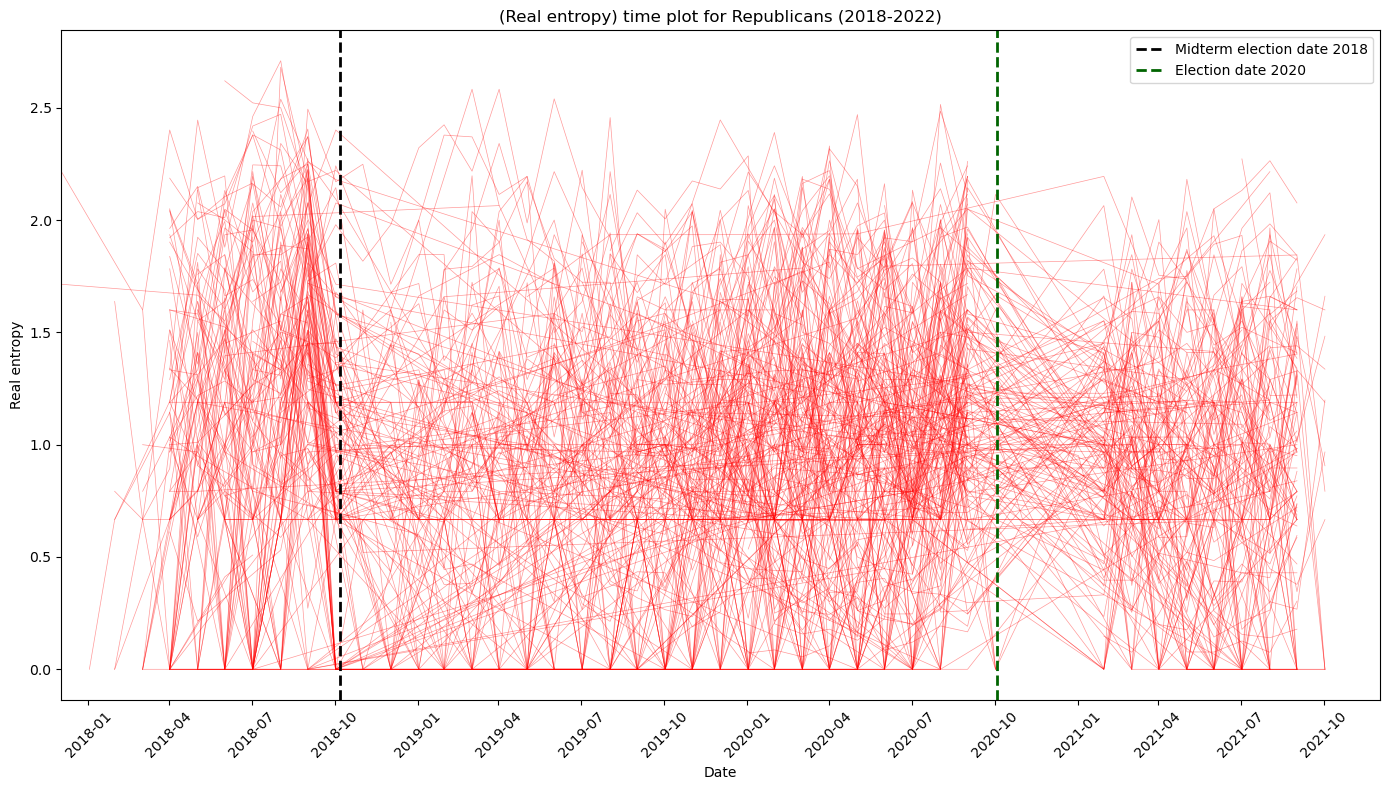

In [249]:
# don't want 2016+2017, filter away 2018 to 2022
filtered_df = real_r[(real_r["year"] >= 2018) & (real_r["year"] <= 2022)]

plt.figure(figsize=(14, 8))

sns.lineplot(
    data=filtered_df,
    x="date",
    y="entropy",
    units="user_id",
    estimator=None,
    color="red",
    linewidth=0.5,
    alpha=0.4,
)

plt.title("(Real entropy) time plot for Republicans (2018-2022)")
plt.xlabel("Date")
plt.ylabel("Real entropy")

# show all months on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.xticks(rotation=45)

plt.axvline(
    pd.Timestamp("2018-11-06"),
    color="black",
    linestyle="--",
    linewidth=2,
    label="Midterm election date 2018",
)
plt.axvline(
    pd.Timestamp("2020-11-03"),
    color="darkgreen",
    linestyle="--",
    linewidth=2,
    label="Election date 2020",
)
plt.xlim(pd.Timestamp("2018-01-01T00:00"), pd.Timestamp("2021-12-31T23:59"))
ticks = pd.date_range("2018-01-01", "2021-12-01", freq="3M")
plt.xticks(ticks, rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

## all politicians

/var/folders/cr/2b4bjd0d6cscnr8h_66vmrqm0000gn/T/ipykernel_39256/1609910884.py:59: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ticks = pd.date_range("2018-01-01", "2021-12-01", freq="3M")


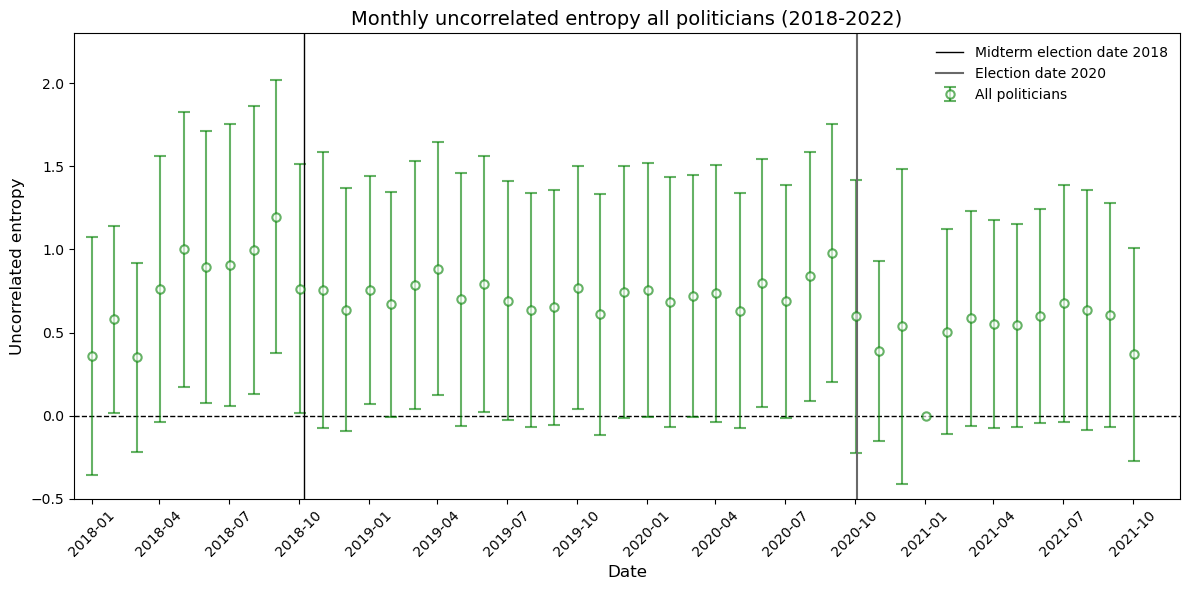

In [285]:
uncor = monthly_uncor.groupby(monthly_uncor["date"].dt.to_period("M"))[
    "entropy"
]  # group by month

mean_u = uncor.mean()  # mean + standard deviation for all politicians
std_u = uncor.std()

# Convert periods to timestamps for compatibility with matplotlib
month_u= mean_u.index.to_timestamp()

plt.figure(figsize=(12, 6))
ax = plt.subplot(111)

plt.errorbar(
    month_u,  # x-axis
    mean_u,
    yerr=std_u,
    fmt="o",
    color="green",  # color of avg circle
    markerfacecolor="white",
    capsize=4,
    ecolor="green",
    zorder=2,
    ms=6,
    mew=1.5,
    label="All politicians",
    alpha=0.6,
)

# horizontal line at 0.0
plt.axhline(y=0, ls="--", color="black", lw=1, zorder=1)

plt.ylabel("Uncorrelated entropy", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.title("Monthly uncorrelated entropy all politicians (2018-2022)", fontsize=14)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=45)

plt.axvline(
    pd.Timestamp("2018-11-06"),
    color="black",
    linestyle="-",
    linewidth=1,
    label="Midterm election date 2018",
)
plt.axvline(
    pd.Timestamp("2020-11-03"),
    color="dimgrey",
    linestyle="-",
    linewidth=1.5,
    label="Election date 2020",
)

plt.legend(loc="best", frameon=False)
plt.ylim(-0.5, 2.3)
plt.xlim(pd.Timestamp("2018-01-08T00:00"), pd.Timestamp("2021-12-31T23:59"))
ticks = pd.date_range("2018-01-01", "2021-12-01", freq="3M")
plt.xticks(ticks, rotation=45)
plt.tight_layout()
plt.show()

/var/folders/cr/2b4bjd0d6cscnr8h_66vmrqm0000gn/T/ipykernel_28266/1630666689.py:59: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ticks = pd.date_range("2018-01-01", "2021-12-01", freq="3M")


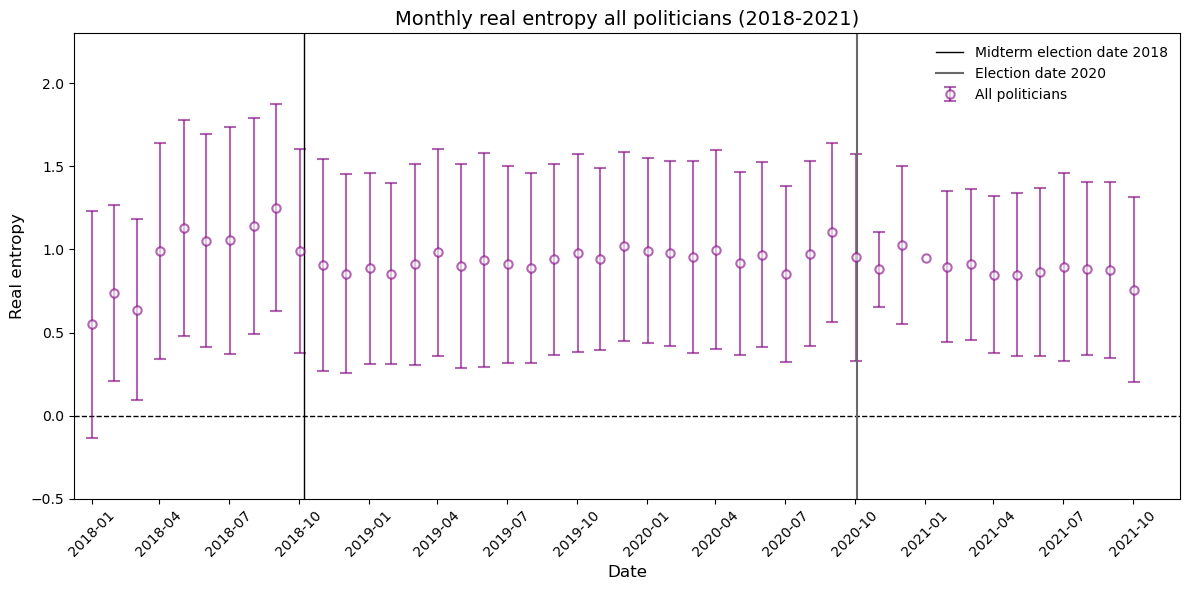

In [10]:
uncor = monthly_real.groupby(monthly_real["date"].dt.to_period("M"))[
    "entropy"
]  # group by month

mean_u = uncor.mean()  # mean + standard deviation for all politicians
std_u = uncor.std()

# Convert periods to timestamps for compatibility with matplotlib
month_u= mean_u.index.to_timestamp()

plt.figure(figsize=(12, 6))
ax = plt.subplot(111)

plt.errorbar(
    month_u,  # x-axis
    mean_u,
    yerr=std_u,
    fmt="o",
    color="purple",  # color of avg circle
    markerfacecolor="white",
    capsize=4,
    ecolor="purple",
    zorder=2,
    ms=6,
    mew=1.5,
    label="All politicians",
    alpha=0.6,
)

# horizontal line at 0.0
plt.axhline(y=0, ls="--", color="black", lw=1, zorder=1)

plt.ylabel("Real entropy", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.title("Monthly real entropy all politicians (2018-2021)", fontsize=14)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=45)

plt.axvline(
    pd.Timestamp("2018-11-06"),
    color="black",
    linestyle="-",
    linewidth=1,
    label="Midterm election date 2018",
)
plt.axvline(
    pd.Timestamp("2020-11-03"),
    color="dimgrey",
    linestyle="-",
    linewidth=1.5,
    label="Election date 2020",
)

plt.legend(loc="best", frameon=False)
plt.ylim(-0.5, 2.3)
plt.xlim(pd.Timestamp("2018-01-08T00:00"), pd.Timestamp("2021-12-31T23:59"))
ticks = pd.date_range("2018-01-01", "2021-12-01", freq="3M")
plt.xticks(ticks, rotation=45)
plt.tight_layout()
plt.show()

# Uncorrelated

/var/folders/cr/2b4bjd0d6cscnr8h_66vmrqm0000gn/T/ipykernel_28266/119600435.py:67: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ticks = pd.date_range("2018-01-01", "2021-12-01", freq="3M")


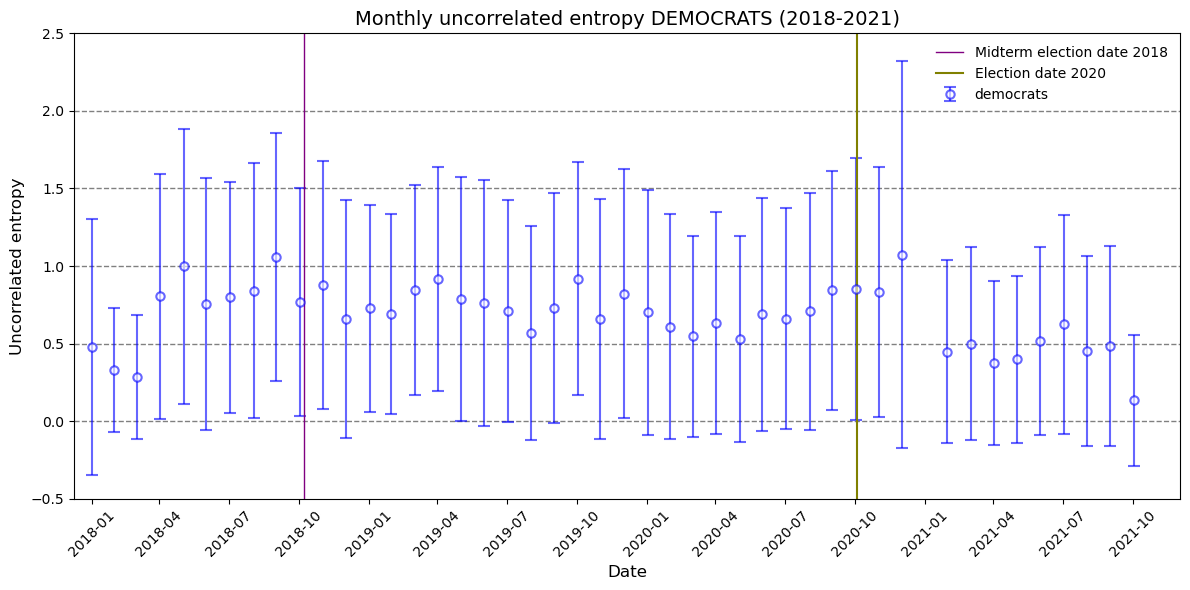

In [14]:
uncor_dem = uncor_d.groupby(uncor_d["date"].dt.to_period("M"))[
    "entropy"
]  # group by month

mean_d = uncor_dem.mean()  # mean + standard deviation for all politicians
std_d = uncor_dem.std()

# Convert periods to timestamps for compatibility with matplotlib
month_d = mean_d.index.to_timestamp()

plt.figure(figsize=(12, 6))
ax = plt.subplot(111)


plt.errorbar(
    month_d,  # x-axis
    mean_d,  # y-axis
    yerr=std_d,  # length of bars defined by standard dev
    fmt="o",
    color="blue",  # color of avg circle
    markerfacecolor="white",
    capsize=4,
    ecolor="blue",
    zorder=2,
    ms=6,
    mew=1.5,
    label="democrats",
    alpha=0.6,
)

# horizontal line at 0.0
plt.axhline(y=0, ls="--", color="grey", lw=1, zorder=1)
plt.axhline(y=1.0, ls="--", color="grey", lw=1, zorder=1)
plt.axhline(y=1.5, ls="--", color="grey", lw=1, zorder=1)
plt.axhline(y=2.0, ls="--", color="grey", lw=1, zorder=1)
plt.axhline(y=0.5, ls="--", color="grey", lw=1, zorder=1)


plt.ylabel("Uncorrelated entropy", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.title("Monthly uncorrelated entropy DEMOCRATS (2018-2021)", fontsize=14)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3)) # show every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=45)

plt.axvline(
    pd.Timestamp("2018-11-06"),
    color="purple",
    linestyle="-",
    linewidth=1,
    label="Midterm election date 2018",
)
plt.axvline(
    pd.Timestamp("2020-11-03"),
    color="olive",
    linestyle="-",
    linewidth=1.5,
    label="Election date 2020",
)

plt.legend(loc="best", frameon=False)
plt.ylim(0, 2.5)
ax.set_yticks([-0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5])

plt.xlim(pd.Timestamp("2018-01-08T00:00"), pd.Timestamp("2021-12-31T23:59"))
ticks = pd.date_range("2018-01-01", "2021-12-01", freq="3M")
plt.xticks(ticks, rotation=45)
plt.tight_layout()
plt.show()

In [16]:
uncor_rep= uncor_r.groupby(uncor_r["date"].dt.to_period("M"))[
    "entropy"
]  # group by month

mean_r = uncor_rep.mean()  # mean + standard deviation for all politicians
std_r = uncor_rep.std()

# Convert periods to timestamps for compatibility with matplotlib
month_r = mean_r.index.to_timestamp()

plt.figure(figsize=(12, 6))
ax = plt.subplot(111)


plt.errorbar(
    month_r,  # x-axis
    mean_r,
    yerr=std_r,
    fmt="o",
    color="red",  # color of avg circle
    markerfacecolor="white",
    capsize=4,
    ecolor="red",
    zorder=2,
    ms=6,
    mew=1.5,
    label="Republicans",
    alpha=0.6,
)

# horizontal line at 0.0
plt.axhline(y=0, ls="--", color="grey", lw=1, zorder=1)
plt.axhline(y=1.0, ls="--", color="grey", lw=1, zorder=1)
plt.axhline(y=1.5, ls="--", color="grey", lw=1, zorder=1)
plt.axhline(y=2.0, ls="--", color="grey", lw=1, zorder=1)
plt.axhline(y=0.5, ls="--", color="grey", lw=1, zorder=1)


plt.ylabel("Uncorrelated entropy", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.title("Monthly uncorrelated entropy REPUBLICANS (2018-2022)", fontsize=14)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=45)

plt.axvline(
    pd.Timestamp("2018-11-06"),
    color="purple",
    linestyle="-",
    linewidth=1,
    label="Midterm election date 2018",
)
plt.axvline(
    pd.Timestamp("2020-11-03"),
    color="olive",
    linestyle="-",
    linewidth=1,5,
    label="Election date 2020",
)

plt.legend(loc="best", frameon=False)
plt.ylim(0, 2.3)
ax.set_yticks([-0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5])
plt.xlim(pd.Timestamp("2018-01-08T00:00"), pd.Timestamp("2021-12-31T23:59"))
ticks = pd.date_range("2018-01-01", "2021-12-01", freq="3M")
plt.xticks(ticks, rotation=45)
plt.tight_layout()
plt.show()

SyntaxError: positional argument follows keyword argument (92560005.py, line 60)

/var/folders/cr/2b4bjd0d6cscnr8h_66vmrqm0000gn/T/ipykernel_28266/551472814.py:68: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ticks = pd.date_range("2018-01-01", "2021-12-01", freq="3M")


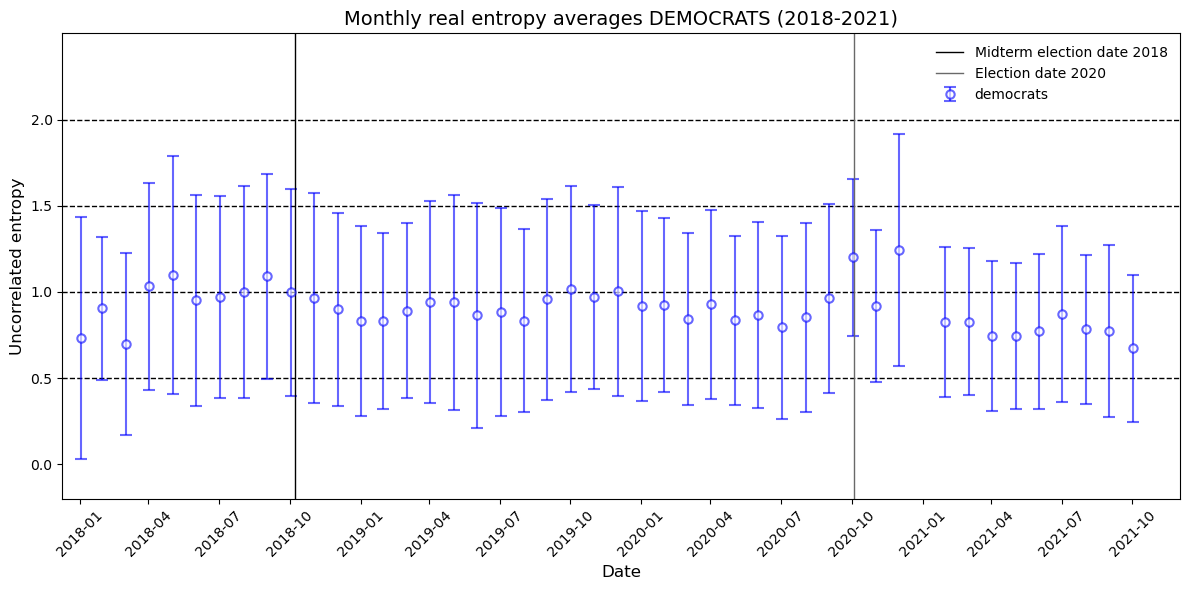

In [17]:
real_dem = real_d.groupby(real_d["date"].dt.to_period("M"))[
    "entropy"
]  # group by month

mean_d = real_dem.mean()  # mean + standard deviation for all politicians
std_d = real_dem.std()

# Convert periods to timestamps for compatibility with matplotlib
month_d = mean_d.index.to_timestamp()

plt.figure(figsize=(12, 6))
ax = plt.subplot(111)


plt.errorbar(
    month_d,  # x-axis
    mean_d,  # y-axis
    yerr=std_d,  # length of bars defined by standard dev
    fmt="o",
    color="blue",  # color of avg circle
    markerfacecolor="white",
    capsize=4,
    ecolor="blue",
    zorder=2,
    ms=6,
    mew=1.5,
    label="democrats",
    alpha=0.6,
)

# horizontal line at 0.0
plt.axhline(y=1.0, ls="--", color="black", lw=1, zorder=1)
plt.axhline(y=1.5, ls="--", color="black", lw=1, zorder=1)
plt.axhline(y=2.0, ls="--", color="black", lw=1, zorder=1)
plt.axhline(y=0.5, ls="--", color="black", lw=1, zorder=1)


plt.ylabel("Uncorrelated entropy", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.title("Monthly real entropy averages DEMOCRATS (2018-2021)", fontsize=14)

plt.gca().xaxis.set_major_locator(
    mdates.MonthLocator(interval=3)
)  # show every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=45)

plt.axvline(
    pd.Timestamp("2018-11-06"),
    color="black",
    linestyle="-",
    linewidth=1,
    label="Midterm election date 2018",
)
plt.axvline(
    pd.Timestamp("2020-11-03"),
    color="dimgrey",
    linestyle="-",
    linewidth=1,
    label="Election date 2020",
)

plt.legend(loc="best", frameon=False)
plt.ylim(-0.2, 2.5)
ax.set_yticks([0.0, 0.5, 1.0, 1.5, 2.0])

plt.xlim(pd.Timestamp("2018-01-08T00:00"), pd.Timestamp("2021-12-31T23:59"))
ticks = pd.date_range("2018-01-01", "2021-12-01", freq="3M")
plt.xticks(ticks, rotation=45)
plt.tight_layout()
plt.show()

/var/folders/cr/2b4bjd0d6cscnr8h_66vmrqm0000gn/T/ipykernel_28266/1336065781.py:65: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ticks = pd.date_range("2018-01-01", "2021-12-01", freq="3M")


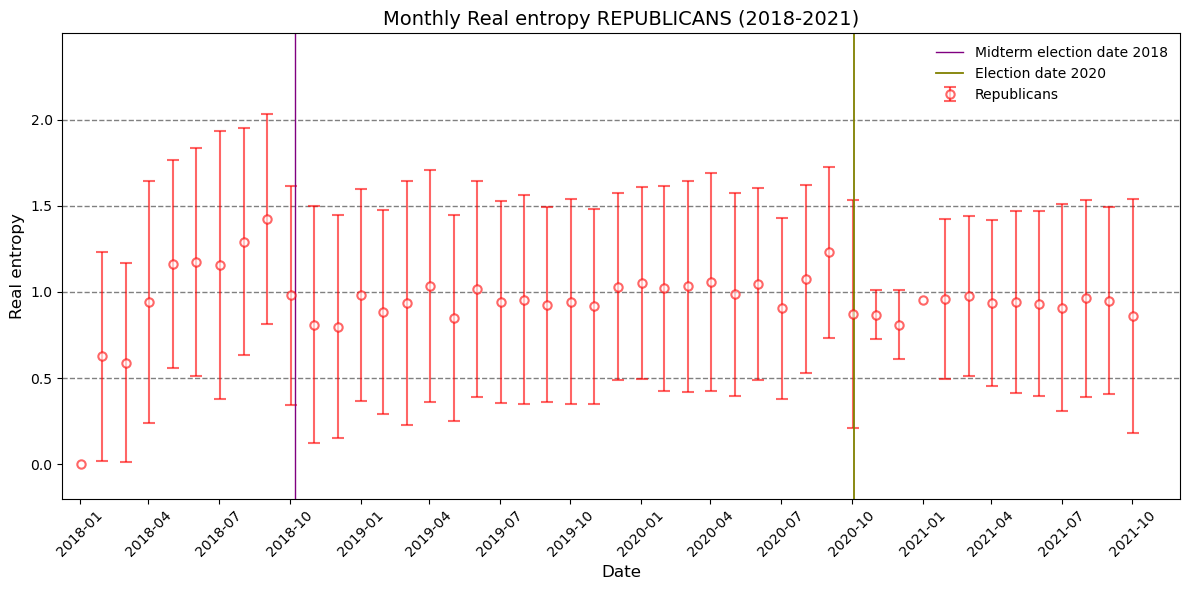

In [21]:
real_rep = real_r.groupby(real_r["date"].dt.to_period("M"))[
    "entropy"
]  # group by month

mean_r = real_rep.mean()  # mean + standard deviation for all politicians
std_r = real_rep.std()

# Convert periods to timestamps for compatibility with matplotlib
month_r = mean_r.index.to_timestamp()

plt.figure(figsize=(12, 6))
ax = plt.subplot(111)


plt.errorbar(
    month_r,  # x-axis
    mean_r,
    yerr=std_r,
    fmt="o",
    color="red",  # color of avg circle
    markerfacecolor="white",
    capsize=4,
    ecolor="red",
    zorder=2,
    ms=6,
    mew=1.5,
    label="Republicans",
    alpha=0.6,
)

# horizontal line at 0.0
plt.axhline(y=1.0, ls="--", color="grey", lw=1, zorder=1)
plt.axhline(y=1.5, ls="--", color="grey", lw=1, zorder=1)
plt.axhline(y=2.0, ls="--", color="grey", lw=1, zorder=1)
plt.axhline(y=0.5, ls="--", color="grey", lw=1, zorder=1)


plt.ylabel("Real entropy", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.title("Monthly Real entropy REPUBLICANS (2018-2021)", fontsize=14)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=45)

plt.axvline(
    pd.Timestamp("2018-11-06"),
    color="purple",
    linestyle="-",
    linewidth=1,
    label="Midterm election date 2018",
)
plt.axvline(
    pd.Timestamp("2020-11-03"),
    color="olive",
    linestyle="-",
    linewidth=1.3,
    label="Election date 2020",
)

plt.legend(loc="best", frameon=False)
plt.ylim(-0.2, 2.5)
ax.set_yticks([0.0, 0.5, 1.0, 1.5, 2.0])
plt.xlim(pd.Timestamp("2018-01-08T00:00"), pd.Timestamp("2021-12-31T23:59"))
ticks = pd.date_range("2018-01-01", "2021-12-01", freq="3M")
plt.xticks(ticks, rotation=45)
plt.tight_layout()
plt.show()

/var/folders/cr/2b4bjd0d6cscnr8h_66vmrqm0000gn/T/ipykernel_28266/92029713.py:87: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ticks = pd.date_range("2018-01-01", "2021-12-01", freq="3M")


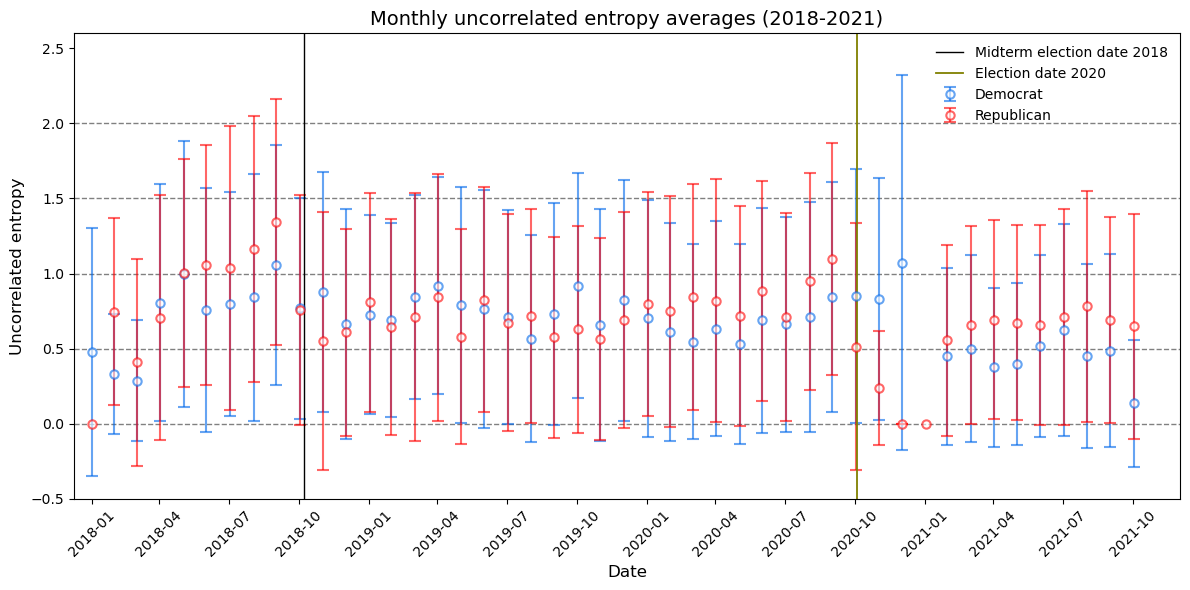

In [22]:
# Filter the data for Democrats and Republicans separately
filtered_d = uncor_d[(uncor_d["year"] >= 2018) & (uncor_d["year"] <= 2022)]
filtered_r = uncor_r[(uncor_r["year"] >= 2018) & (uncor_r["year"] <= 2022)]

grouped_d = filtered_d.groupby(filtered_d["date"].dt.to_period("M"))["entropy"] #group by month
grouped_r = filtered_r.groupby(filtered_r["date"].dt.to_period("M"))["entropy"]

mean_d = grouped_d.mean() #  democrats
std_d = grouped_d.std()

mean_r = grouped_r.mean()  # republicans
std_r = grouped_r.std()

month_d = mean_d.index.to_timestamp()
month_r = mean_r.index.to_timestamp()

plt.figure(figsize=(12, 6))
ax = plt.subplot(111)

# democrats
plt.errorbar(
    month_d,  # x-axis
    mean_d,
    yerr=std_d,
    fmt="o",
    color="#0068ea",
    markerfacecolor="white",
    capsize=4,
    ecolor="#0068ea",
    zorder=2,
    ms=6,
    mew=1.5,
    label="Democrat",  
    alpha=0.6,
)

# republicans
plt.errorbar(
    month_r,
    mean_r,
    yerr=std_r,
    fmt="o",
    color="red",
    markerfacecolor="white",
    capsize=4,
    ecolor="red",
    zorder=2,
    ms=6,
    mew=1.5,
    label="Republican",
    alpha=0.6,
)

# line for ref, do a grid one day
plt.axhline(y=0, ls="--", color="grey", lw=1, zorder=1)
plt.axhline(y=1.0, ls="--", color="grey", lw=1, zorder=1)
plt.axhline(y=1.5, ls="--", color="grey", lw=1, zorder=1)
plt.axhline(y=2.0, ls="--", color="grey", lw=1, zorder=1)
plt.axhline(y=0.5, ls="--", color="grey", lw=1, zorder=1)

plt.ylabel("Uncorrelated entropy", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.title("Monthly uncorrelated entropy averages (2018-2021)", fontsize=14)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=45)

plt.axvline(
    pd.Timestamp("2018-11-06"),
    color="black",
    linestyle="-",
    linewidth=1,
    label="Midterm election date 2018",
)
plt.axvline(
    pd.Timestamp("2020-11-03"),
    color="olive",
    linestyle="-",
    linewidth=1.3,
    label="Election date 2020",
)

plt.legend(loc="best", frameon=False)
plt.ylim(-0.5, 2.6)
plt.xlim(pd.Timestamp("2018-01-08T00:00"), pd.Timestamp("2021-12-31T23:59"))
ticks = pd.date_range("2018-01-01", "2021-12-01", freq="3M")
plt.xticks(ticks, rotation=45)
plt.tight_layout()
plt.show()

/var/folders/cr/2b4bjd0d6cscnr8h_66vmrqm0000gn/T/ipykernel_28266/2223731931.py:83: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ticks = pd.date_range("2018-01-01", "2021-12-01", freq="3M")


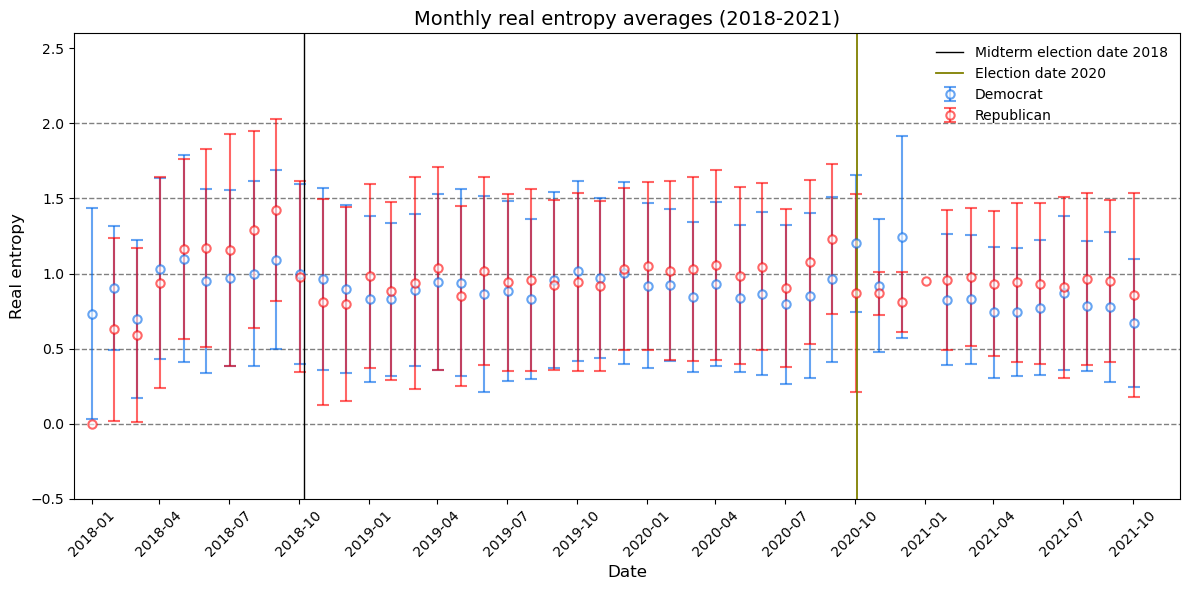

In [23]:
grouped_d = real_d.groupby(real_d["date"].dt.to_period("M"))[
    "entropy"
]  # group by month
grouped_r = real_r.groupby(real_r["date"].dt.to_period("M"))["entropy"]

mean_d = grouped_d.mean()  # mean + standard deviation for democrats
std_d = grouped_d.std()

mean_r = grouped_r.mean()  # mean + standard deviation for republicans
std_r = grouped_r.std()

month_d = mean_d.index.to_timestamp()
month_r = mean_r.index.to_timestamp()


plt.figure(figsize=(12, 6))
ax = plt.subplot(111)

plt.errorbar(
    month_d,  # x-axis
    mean_d,
    yerr=std_d,
    fmt="o",
    color="#0068ea",
    markerfacecolor="white",
    capsize=4,
    ecolor="#0068ea",
    zorder=2,
    ms=6,
    mew=1.5,
    label="Democrat",  # Circle size and outline width
    alpha=0.6,
)

plt.errorbar(
    month_r,
    mean_r,
    yerr=std_r,
    fmt="o",
    color="red",
    markerfacecolor="white",
    capsize=4,
    ecolor="red",
    zorder=2,
    ms=6,
    mew=1.5,
    label="Republican",
    alpha=0.6,
)

# lines from y-axis
plt.axhline(y=0, ls="--", color="grey", lw=1, zorder=1)
plt.axhline(y=1.0, ls="--", color="grey", lw=1, zorder=1)
plt.axhline(y=1.5, ls="--", color="grey", lw=1, zorder=1)
plt.axhline(y=2.0, ls="--", color="grey", lw=1, zorder=1)
plt.axhline(y=0.5, ls="--", color="grey", lw=1, zorder=1)

plt.ylabel("Real entropy", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.title("Monthly real entropy averages (2018-2021)", fontsize=14)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=45)

plt.axvline(
    pd.Timestamp("2018-11-06"),
    color="black",
    linestyle="-",
    linewidth=1,
    label="Midterm election date 2018",
)
plt.axvline(
    pd.Timestamp("2020-11-03"),
    color="olive",
    linestyle="-",
    linewidth=1.3,
    label="Election date 2020",
)

plt.legend(loc="best", frameon=False)
plt.ylim(-0.5, 2.6)
plt.xlim(pd.Timestamp("2018-01-08T00:00"), pd.Timestamp("2021-12-31T23:59"))
ticks = pd.date_range("2018-01-01", "2021-12-01", freq="3M")
plt.xticks(ticks, rotation=45)
plt.tight_layout()
plt.show()

## sanity check

In [232]:
january_data = uncor_r[uncor_r["date"].dt.to_period("M") == "2018-01"]
print("Raw Data for feb 2018:")
print(january_data)

calculated_mean = january_data["entropy"].mean()
calculated_std = january_data["entropy"].std()

print("Manual Calculation:")
print(f"Mean: {calculated_mean}, Std Dev: {calculated_std}")

mean_d = uncor_r.groupby(uncor_r["date"].dt.to_period("M"))["entropy"].mean()
std_d = uncor_r.groupby(uncor_r["date"].dt.to_period("M"))["entropy"].std()

grouped_mean = mean_d.loc[pd.Period("2018-01", freq="M")]
grouped_std = std_d.loc[pd.Period("2018-01", freq="M")]

print("From Grouped Data:")
print(f"Mean: {grouped_mean}, Std Dev: {grouped_std}")

Raw Data for feb 2018:
              user_id        name       party ad_creation_time  year  month  \
3687  239866352781313    Tom Cole  Republican       2018-01-24  2018      1   
5001  471928596287830  Brian Mast  Republican       2018-01-26  2018      1   

       entropy       date  
3687  1.298795 2018-01-01  
5001  2.584963 2018-01-01  
Manual Calculation:
Mean: 1.9418787207082775, Std Dev: 0.909457803436369
From Grouped Data:
Mean: 1.9418787207082775, Std Dev: 0.9094578034363688
